In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint



''' LOADING AND PREPROCESSING DATA '''
X_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/Image Classification CNN Keras Dataset/labels_test.csv', delimiter=',')

X_train = X_train.reshape(-1, 100, 100, 3)
X_test = X_test.reshape(-1, 100, 100, 3)

# ENCODING CLASS LABELS (0 for 'dog', 1 for 'cat')
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Creating ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Loading MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Adding custom top layers for binary classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


''' TRAINING THE MODEL '''
# Creating the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 5

#Training the model
model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size), steps_per_epoch=len(X_train) / batch_size, epochs=epochs)


Epoch 1/5
62/62 [==============================] - 35s 125ms/step - loss: 0.4169 - accuracy: 0.8005
Epoch 2/5
62/62 [==============================] - 10s 166ms/step - loss: 0.2586 - accuracy: 0.8890
Epoch 3/5
62/62 [==============================] - 11s 181ms/step - loss: 0.2143 - accuracy: 0.9050
Epoch 4/5
62/62 [==============================] - 6s 98ms/step - loss: 0.1827 - accuracy: 0.9195
Epoch 5/5
62/62 [==============================] - 11s 169ms/step - loss: 0.1604 - accuracy: 0.9405


In [ ]:
''' MODEL EVALUATION ON TEST DATASET '''
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

13/13 [==============================] - 1s 19ms/step - loss: 0.4675 - accuracy: 0.8525
Test loss: 0.4675, Test accuracy: 0.8525


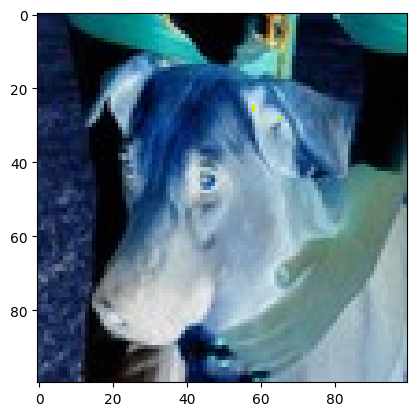

1/1 [==============================] - 1s 764ms/step
Model Prediction: dog


In [ ]:
''' PREDICTING LABEL OF NEW IMAGE '''
# Generating a random index for a test image
random_idx = random.randint(0, len(Y_test) - 1)

# Displaying a random test image
plt.imshow((X_test[random_idx]* 255).astype('uint8'))
plt.show()

# Making predictions on the random test image
y_pred = model.predict(X_test[random_idx].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'

print("Model Prediction:", pred)

In [ ]:
''' MODEL PERFORMANCE REPORT ON TEST DATASET '''
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
y_pred_binary = (y_pred > 0.5).astype(int)
report = classification_report(Y_test, y_pred_binary)
print(report)

13/13 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       200
           1       0.82      0.90      0.86       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400

